# Makemore part 2 (MLP) by paper

In [624]:
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.manual_seed(2147483647)

#### Create Dataset

In [625]:
names = pd.read_csv("../names.txt",names = ["label"])
words = names.label



In [626]:
all_stoi = {}
all_itos ={}

all = set("".join(words+"."))
for index,(chr) in enumerate(sorted(all)):
    all_stoi[chr] = index

for index,(chr) in enumerate(sorted(all)):
    all_itos[index] = chr

# all_stoi

In [627]:
x = []
y = []


blocks = 3


for word in names.label:
    

    wx = [("."* (blocks - i)) + word  for i in range(blocks)]
    wy = [y.append(all_stoi[i]) for i in (word+".")]
    for ch1,ch2,ch3 in zip(*wx[:len(wx)]):
        x.append((all_stoi[ch1],all_stoi[ch2],all_stoi[ch3]))


x = torch.tensor(x)
y = torch.tensor(y)


print("x: ",x)
      
print("y: ",y)

x:  tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])
y:  tensor([ 5, 13, 13,  ..., 26, 24,  0])


In [628]:
# train: 70%
# val: 30%
# test: 10%

train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.2, shuffle=True,stratify = y, random_state=42)
test_x,val_x,test_y,val_y = train_test_split(val_x,val_y,test_size=0.1, shuffle=True,stratify = val_y, random_state=42)

# print(f"x: {x.shape} y: {y.shape}")
print(f"train_x: {train_x.shape} train_y: {train_y.shape}")
print(f"val_x: {val_x.shape} val_y: {val_y.shape}")
print(f"test_x: {test_x.shape} test_y: {test_y.shape}")

train_x: torch.Size([182516, 3]) train_y: torch.Size([182516])
val_x: torch.Size([4563, 3]) val_y: torch.Size([4563])
test_x: torch.Size([41067, 3]) test_y: torch.Size([41067])


In [629]:
# print("x.shape: ",x.shape,"x.dtype: ",x.dtype,"y.shape: ",y.shape,"y.dtype: ",y.dtype)

In [630]:
# c = torch.randn(27,2)

In [631]:
# emb = c[x]
# emb.shape

In [632]:
# W = torch.randn(6,100)
# B = torch.randn(100)

In [633]:
# z = emb.view(-1,6) @ W + B #-1 automatically pytorch find the other dim and put there 32 cause emb.shape => 32,3,2

In [634]:
# we know the tanh we use on this upper layer directly but for some understanding purposes
# z = torch.tanh(emb.view(-1,6) @ W + B)
# z.shape

In [635]:
# W2 = torch.randn(100,27)
# B2 = torch.randn(27)

In [636]:
# logits = z @ W2+B2
# logits.shape

In [637]:
# same as Cross Entropy works
# logits = z1.exp()
# prob = logits/logits.sum(1,keepdims=True)
# loss = -prob[torch.arange(32),y].log().mean()
# loss
# Output: 17.6186

# prob[0].sum()   # Ans: 1.0  so it is normalized



# loss = F.cross_entropy(logits,y)
# loss
# Output: 17.6186



In [638]:
# Parameters

c = torch.randn(27,10,requires_grad = True)

W = torch.randn(30,200,requires_grad = True)
B = torch.randn(200,requires_grad = True)

W2 = torch.randn(200,27,requires_grad = True)
B2 = torch.randn(27,requires_grad = True)

lrs = torch.linspace(-3,0,1000)
lr = 0.1
# lr = torch.tensor(0.1)

parameter = [c,W,B,W2,B2]

lri = []
lossi = []
stepi=[]

In [641]:
for i in range(60000):
    mini_batchx = torch.randint(0,train_x.shape[0],(32,)) # mini batches make execution faster and boost the forward, backward pass

    # Forward pass
    emb = c[train_x[mini_batchx]] # [32, 3, 2]
    z = torch.tanh(emb.view(-1,30) @ W + B) # [32, 100]
    logits = z @ W2+B2 #[32, 27]
    loss = F.cross_entropy(logits,y[mini_batchx])
    
    # Backward pass
    for p in parameter:
        p.grad = None
    loss.backward()
    for p in parameter:
        p.data += -lr*p.grad

    # Track stats
    # lri.append(lr)
    lossi.append(loss.log10().item())
    stepi.append(i)

print(f"{loss.item()= }")  

loss.item()= 3.0613925457000732


In [614]:
# testing on Full dataset 
emb = c[val_x] # [32, 3, 2]
z = torch.tanh(emb.view(-1,30) @ W + B) # [32, 100]
logits = z @ W2+B2 #[32, 27]
loss = F.cross_entropy(logits,val_y)
loss



tensor(2.9046, grad_fn=<NllLossBackward0>)

In [615]:
# testing on Full dataset 
emb = c[train_x] # [32, 3, 2]
z = torch.tanh(emb.view(-1,30) @ W + B) # [32, 100]
logits = z @ W2+B2 #[32, 27]
loss = F.cross_entropy(logits,train_y)
loss

tensor(2.8993, grad_fn=<NllLossBackward0>)

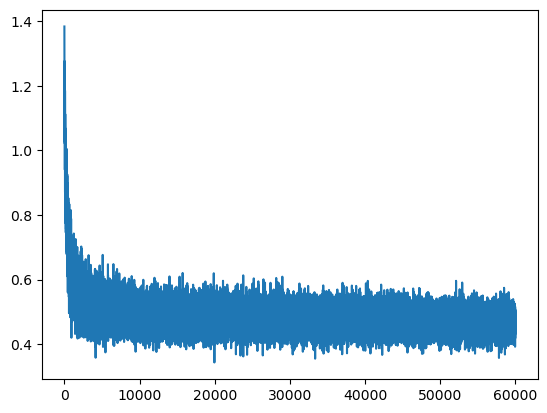

In [616]:
# plot the data
plt.plot(stepi,lossi)
plt.show()

In [617]:
# so now you can see here the both loss are nearest and it means the model is underfitting not in overfitting now so we need more additional neurons
# we are make an update on 100 neurons to 300 neurons 


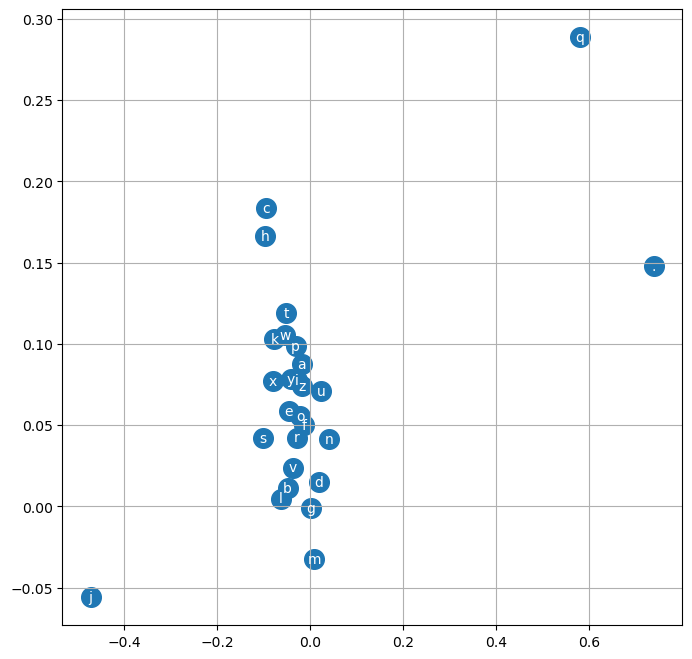

In [618]:
plt.figure(figsize = (8,8))
plt.scatter(c[:,0].data,c[:,1].data,s =200)
for i in range(c.shape[0]):
    plt.text(c[i,0].item(), c[i,1].item(), all_itos[i], ha="center", va="center", color='white')
plt.grid("minor")